In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **1) Regression avec SKLearn**

**Datasets lineaire**

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
np.random.seed(0)
m = 100 # Creating 100 samples
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

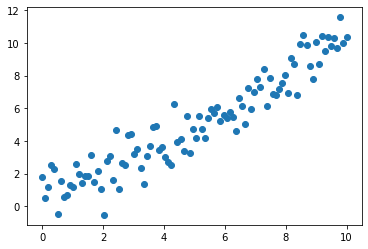

In [4]:
plt.scatter(X, y)

In [5]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)  ### Coefficient de Regression R^2

0.8881140743377214

In [ ]:
model.predict(X)[:10]

array([[0.20847145],
       [0.30647825],
       [0.40448505],
       [0.50249185],
       [0.60049865],
       [0.69850544],
       [0.79651224],
       [0.89451904],
       [0.99252584],
       [1.09053264]])

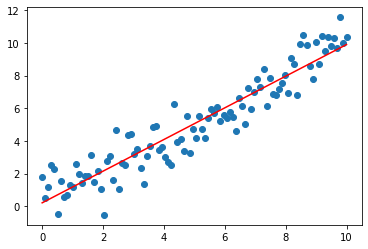

In [6]:
predictions = model.predict(X)
plt.scatter(X, y)
plt.plot(X, predictions, c='r')

**Datasets non lineaire**

In [7]:
from sklearn.svm import SVR

In [ ]:
np.random.seed(0)
m = 100 # Creating 100 samples
X = np.linspace(0, 10, m).reshape(m, 1)
y = X**2 + np.random.randn(m, 1)

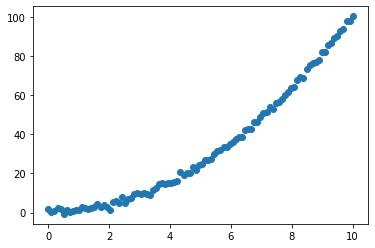

In [ ]:
plt.scatter(X, y)

In [ ]:
model = SVR(C=100)
model.fit(X, y)
model.score(X, y)  ### Coefficient de Regression R^2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9989763625652847

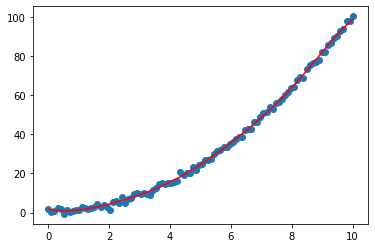

In [ ]:
predictions = model.predict(X)
plt.scatter(X, y)
plt.plot(X, predictions, c='r')


# **2) Classification: Survivants du titanic**

In [1]:
import pandas as pd
import seaborn as sns

In [6]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True) ## Attention, ce fichier est a compile entierement apres la compilationde cette ligne
titanic.head()


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


**Avec un autre Estimateur**

In [8]:
from sklearn.neighbors import  KNeighborsClassifier

In [9]:
model = KNeighborsClassifier()

In [11]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)
print(X.head())
print(y.head())

   pclass  sex   age
0       3    0  22.0
1       1    1  38.0
2       3    1  26.0
3       1    1  35.0
4       3    0  35.0
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [ ]:
model.fit(X, y)
model.score(X ,y)

0.8319327731092437

In [ ]:
model.predict(X)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [ ]:
def survie(model, pclass, sex, age):
  X1 = np.array([pclass, sex, age]).reshape(1, 3)
  print(model.predict(X1))
  print(model.predict_proba(X1))

In [ ]:
pclass=3
sex=0
age=26

survie(model, pclass, sex, age)

[0]
[[0.6 0.4]]


# **Exercice**

Modifier le nombre de voisin, pour savoir quelle est la valeur de cette hyper-parametre qui nous donne les meilleur performance sur notre datasets

# **Correction**  
(**Attention** ceci reste une maauvaise approche)

2


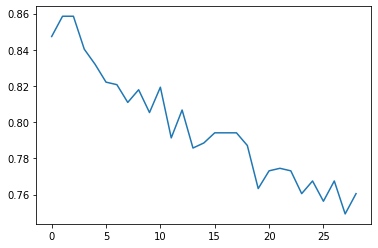

In [ ]:
score = []
best_k = 1
best_score = 0

for k in range(best_k, 30):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X, y)
  score.append(model.score(X, y))

  if best_score < model.score(X, y):
    best_k = k
    best_score = model.score(X, y)

print(best_k)
plt.plot(score)

  

**Mais a la place il faut:**
*   Creer un Train set et un Test set. Entrainer puis evaluer
*   Avec GridSearch, trouver Les meilleurs hyper-parametres n_neighbors metrics et weights
*   Est-ce-que collecter plus de donnees serait utile?
*   Partage tes resultats en commentaire!

